<a href="https://colab.research.google.com/github/amalshalayel/Breast-Cancer-Diagnosis/blob/main/pca_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Data Analysis

dataset:breast-cancer-wisconsin-data


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import drive 
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/breast-cancer-wisconsin-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/breast-cancer-wisconsin-data/data.csv


In [6]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

In [8]:
raw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast-cancer-wisconsin-data/data.csv')
raw_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Using the info method in `dataframe` we can see how many `null` values and  the `datatype` of our columns.

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

drop unnecessary two columns  'id' and 'Unnamed: 32' 

In [11]:
df = raw_df.drop(columns=['id', 'Unnamed: 32'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory Data Analysis

In [22]:
fig = px.histogram(df, 
                   x='diagnosis', 
                   color_discrete_sequence=['blue'],
                   title='Diagnosis Count', width = 500 )
fig.update_layout(bargap=0.3)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

There are 357 Benign Cases and 212 Malignant breast cancer cases.

## Data Pre-processing
Splitting `df` into `input_cols` to make sure there is no categorical data. No categorical columns in the dataset so just using slicing method to make a list of columns and store that into `input-cols`.use slicing method to extract the list of `input_cols` and `target_col`.

In [23]:
input_cols = df.columns[1:]
input_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [24]:
target_col =  df.columns[0]
target_col

'diagnosis'

make copy of original dataframe `df` and storing the contents into the new dataframe `inputs_df` and `targets`. `inputs_df` contains all the data are independent variable, `targets` contain the dependent variable.

In [25]:
inputs_df = df[list(input_cols)].copy()
inputs_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
targets = df[(target_col)]
targets

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

### Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[input_cols])
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols].describe().loc[['min', 'max']]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
targets1 = encoder.fit_transform(targets)
targets1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Principal Component Analysis (PCA)

 reduce the number of variables using Principal Component Analysis 

In [29]:
from sklearn.preprocessing import scale
from sklearn import decomposition
X = scale(inputs_df)
pca = decomposition.PCA(n_components=5)
pca.fit(X)

PCA(n_components=5)

In [30]:
scores = pca.transform(X)
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])
target = pd.Series(targets1, name='target')
result_df = pd.concat([scores_df, target], axis=1)
result_df.head()

,PC1,PC2,PC3,PC4,PC5,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,1


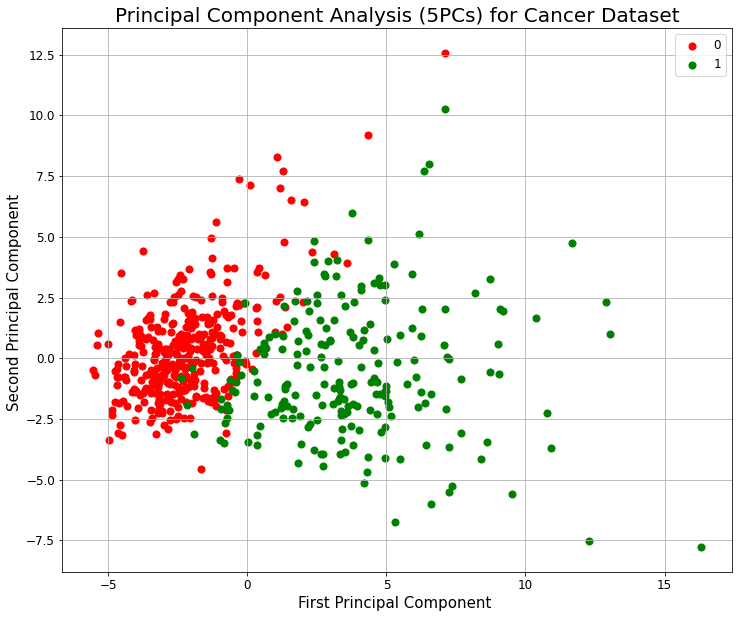

In [32]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)

ax.set_title('Principal Component Analysis (5PCs) for Cancer Dataset', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = targets1 == target
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], 
               result_df.loc[indicesToKeep, 'PC2'],
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

**Explained Variance Ratio**

variance ratio is the percentage of variance that is attributed by each of the selected components.


In [33]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]

 Total Variance Explained: 84.73


We can see that our first two principal components explain the majority of the variance in this dataset (84.73%)! This is an indication of the total information represented compared to the original data.

## Splitting Data

Training data will be used to train our model and we will validate the score on the validation data.

test size: 0.25 and train size: 0.75

In [34]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df, 
                                                                        targets1, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [ ]:
train_inputs.shape, train_targets.shape, val_inputs.shape, val_targets.shape

((426, 30), (426,), (143, 30), (143,))

## Training Models to find the best one 

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [36]:
names = ['Logistic Regression', "Nearest_Neighbors", "Linear_SVM","Gradient_Boosting", "Decision_Tree", "Random_Forest"]
classifiers = [
    LogisticRegression(solver='liblinear'),
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100)]

In [37]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(train_inputs, train_targets)
    score = clf.score(val_inputs, val_targets)
    scores.append(score)

In [38]:
scores_df = pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = scores
scores_df.sort_values('score', ascending= False)

,name,score
0,Logistic Regression,0.972028
1,Nearest_Neighbors,0.972028
5,Random_Forest,0.972028
2,Linear_SVM,0.965035
3,Gradient_Boosting,0.958042
4,Decision_Tree,0.951049


We would NOT be picking the Gradient Boosting and Decision Tree since the test/validation score is less than 96%. Let's go ahead and tune some Hyperparameters.

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
C_range = np.arange(1,11,1)
penalty_range= ['l2','l1']
max_iter_range = np.arange(1,110,10)
param_grid = dict(C=C_range, penalty=penalty_range, max_iter= max_iter_range)
model = LogisticRegression(solver='liblinear',)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(train_inputs, train_targets)
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

In [40]:
neighbors_range = np.arange(1,7,1)
leaf_size_range = np.arange(10,40,10)
param_grid = dict(n_neighbors=neighbors_range, leaf_size=leaf_size_range)
model = KNeighborsClassifier(n_jobs=-1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(train_inputs, train_targets)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'leaf_size': 10, 'n_neighbors': 5} with a score of 0.96


In [41]:
Kernel_range = ['linear','rbf']
C_range = np.arange(1,6,1)
param_grid = dict(kernel=Kernel_range, C= C_range)
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid.fit(train_inputs, train_targets)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'kernel': 'rbf'} with a score of 0.98


In [42]:
max_depth_range = np.arange(1,8,1)
max_features_range= np.arange(1,31,1)
max_leaf_nodes_range = np.arange(2,100,10)
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(max_depth=max_depth_range, max_features=max_features_range, max_leaf_nodes=max_leaf_nodes_range)
model = RandomForestClassifier(n_jobs=-1, random_state=42)
clf = RandomizedSearchCV(model, distributions, random_state=42)
clf.fit(train_inputs, train_targets)
print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

The best parameters are {'max_leaf_nodes': 82, 'max_features': 14, 'max_depth': 6} with a score of 0.96


In [43]:
names = ['Logistic Regression', "Nearest_Neighbors", "Linear_SVM", "Random_Forest"]
classifiers = [
    LogisticRegression(C=4,max_iter=11, penalty='l1',solver='liblinear'),
    KNeighborsClassifier(leaf_size=10, n_neighbors=5),
    SVC(kernel="rbf", C=1),
    RandomForestClassifier(max_leaf_nodes=82,max_features=14, max_depth=6)]

In [44]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(train_inputs, train_targets)
    score = clf.score(val_inputs, val_targets)
    scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [45]:
scores_df = pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = scores
scores_df.sort_values('score', ascending= False)

,name,score
2,Linear_SVM,0.979021
0,Logistic Regression,0.972028
1,Nearest_Neighbors,0.965035
3,Random_Forest,0.965035


**SVM** give the best accuracy score i.e 98.60 without much hyperparameter tuning. 


SUMMARY OF THE NOTEBOOK:-
1. 357 Benign Cases and 212 Malignant breast cancer cases. Compactness Mean is more in the Malignant Cases as compared to the Benign Cases.
2. Depending upon the data and the computational power, one should use GridSearch or RandomizedSearch for hyperparameter tuning
3. PCA is a great way to shift from high dimensionality to low dimensionality. One must choose the number of components (while performing PCA) to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting.
